# Vehicle and Tire Recalls Data Analysis

## Setup

In [4]:
#!/bin/bash
!curl -L -o safety-recalls.zip https://www.kaggle.com/api/v1/datasets/download/nhtsa/safety-recalls
!unzip safety-recalls.zip
!rm safety-recalls.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1899k  100 1899k    0     0  3158k      0 --:--:-- --:--:-- --:--:-- 3158k
Archive:  safety-recalls.zip
  inflating: database.csv            


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
raw_data = pd.read_csv('database.csv')
raw_data.head()

,Record ID,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
0,1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
1,2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
3,4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
4,5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


NOTES:

- fix year 9999
- change date types
- address missing values
- dates out of range

## Pre-processing

In [7]:
df = raw_data.set_index('Record ID')
df.head()

,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
Record ID,,,,,,,,,,,,,,
1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


In [8]:
df.dtypes

,0
NHTSA Campaign,object
Manufacturer Campaign,object
Vehicle Make,object
Vehicle Model,object
Model Year,int64
Vehicle Manufacturer,object
Recall Type,object
Recall Component,object
Manufacture Start Date,float64
Manufacture End Date,float64


We want to change `'Manufacture Start Date'`, `'Manufacture End Date'`, and `'Recall Notification Date'` to `pd.DateTime`.

In [9]:
def to_date(val):
  # format: YYYYMMDD.0
  if np.isnan(val):
    return pd.NaT
  val = str(int(val)) # drop the .0 and convert back to string
  if len(val) != 8: # if the remaining string does not have 8 characters (YYYYMMDD)
    return np.datetime64('NaT')
  year = int(val[:4])
  month = int(val[4:6])
  day = int(val[6:])
  if year < 1967 or year > 3000:
    return pd.NaT
  return pd.Timestamp(year, month, day)

In [10]:
date_cols = ['Manufacture Start Date', 'Manufacture End Date', 'Recall Notification Date']
for col in date_cols:
  df[col] = df[col].apply(to_date)

**Change all words to uppercase.**

In [11]:
word_cols = [
    'Vehicle Make',
    'Vehicle Model',
    'Vehicle Manufacturer',
    'Recall Type',
    'Recall Component',
    'Recall Initiative',
    'Recall Manufacturer'
]
for col in word_cols:
  df[col] = df[col].str.upper()

**Extract `'Recall Year'` from `'Recall Notification Date'`.**

In [12]:
df['Recall Year'] = df['Recall Notification Date'].dt.year
df['Manufacture Start Year'] = df['Manufacture Start Date'].dt.year
df['Manufacture End Year'] = df['Manufacture End Date'].dt.year

In [13]:
df

,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date,Recall Year,Manufacture Start Year,Manufacture End Year
Record ID,,,,,,,,,,,,,,,,,
1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,1999-07-19,2001-05-31,291854.0,ODI,FORD MOTOR COMPANY,2003-02-10,2003.0,1999.0,2001.0
2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,1999-07-19,2001-05-31,291854.0,ODI,FORD MOTOR COMPANY,2003-02-10,2003.0,1999.0,2001.0
3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,2002-07-30,2002-08-13,86.0,MFR,"JAYCO, INC.",2002-09-23,2002.0,2002.0,2002.0
4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaT,NaT,6223.0,MFR,MONACO COACH CORPORATION,2002-11-05,2002.0,NaN,NaN
5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaT,NaT,6223.0,MFR,MONACO COACH CORPORATION,2002-11-05,2002.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123833,16V803000,1016G (PB) & 16KWC,PETERBILT,567,2017,PACCAR INCORPORATED,VEHICLE,TIRES,2016-03-07,2016-10-05,202.0,MFR,PACCAR INCORPORATED,2016-12-14,2016.0,2016.0,2016.0
123834,16V803000,1016G (PB) & 16KWC,PETERBILT,389,2017,PACCAR INCORPORATED,VEHICLE,TIRES,2016-03-07,2016-10-05,202.0,MFR,PACCAR INCORPORATED,2016-12-14,2016.0,2016.0,2016.0
123835,16V803000,1016G (PB) & 16KWC,PETERBILT,367,2017,PACCAR INCORPORATED,VEHICLE,TIRES,2016-03-07,2016-10-05,202.0,MFR,PACCAR INCORPORATED,2016-12-14,2016.0,2016.0,2016.0


## Missing Value Assessment

**Addressing missing values.**

In [14]:
raw_data.isna().sum()

,0
Record ID,0
NHTSA Campaign,0
Manufacturer Campaign,81547
Vehicle Make,0
Vehicle Model,0
Model Year,0
Vehicle Manufacturer,5
Recall Type,0
Recall Component,0
Manufacture Start Date,32534


**Explore `'Manufactuerer Campaign'`.**

In [15]:
df['Manufacturer Campaign'].value_counts()

,count
Manufacturer Campaign,
215-D,286
05S28,246
1.5E-67,218
13FI-1013,217
147,207
...,...
P77,1
M1,1
60A,1


**Conduct a hypothesis test for the missingness of `'Manufacturer Campaign'` on `'NHTSA Campaign'`.**

In [16]:
# calculate the total variation distance of 'col' between the two groups
def total_variation_distance(df, group1, group2, col, verbose=False):
  dist_1 = df.loc[group1, col].value_counts()
  dist_1 = dist_1 / dist_1.sum()
  dist_1 = dist_1.reindex(df[col].unique(), fill_value=0)

  dist_2 = df.loc[group2, col].value_counts()
  dist_2 = dist_2 / dist_2.sum()
  dist_2 = dist_2.reindex(df[col].unique(), fill_value=0)

  if verbose:
    return dist_1, dist_2
  return 0.5 * np.abs(dist_1 - dist_2).sum()

In [17]:
# calculate the p-value given an observed value and empirical data
def two_tail_pval(observed, empirical):
  empirical = np.array(empirical)
  mean = empirical.mean()
  std = empirical.std()
  empirical = (empirical - mean) / std
  observed = (observed - mean) / std
  pval = (np.abs(empirical) >= observed).mean()
  return pval

In [18]:
col = 'NHTSA Campaign'
n_reps = 100
shuffled = df.copy()
shuffled['MC Missing'] = shuffled['Manufacturer Campaign'].isna()
missing_group = shuffled['MC Missing'] == True
not_missing_group = shuffled['MC Missing'] == False

tvds = []
observed_tvd = total_variation_distance(df, missing_group, not_missing_group, col)

for _ in range(n_reps):
  shuffled[col] = np.random.permutation(shuffled[col])
  tvd = total_variation_distance(shuffled, missing_group, not_missing_group, col)
  tvds.append(tvd)

pval = two_tail_pval(observed_tvd, tvds)
pval

0.0

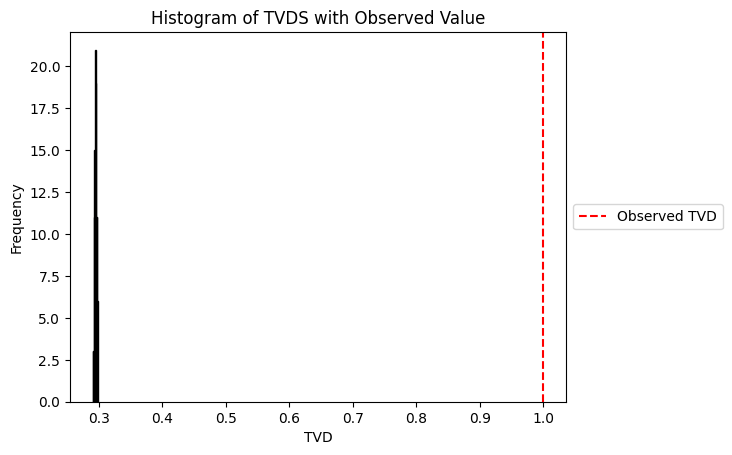

In [19]:
sns.histplot(tvds)
plt.axvline(x=observed_tvd, color='red', linestyle='--', label='Observed TVD')
plt.title('Histogram of TVDS with Observed Value')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [20]:
dist_1, dist_2 = total_variation_distance(df, missing_group, not_missing_group, col, verbose=True)
print(dist_1 == dist_2)
print(f'Shared proportions: {(dist_1 == dist_2).sum()}')

NHTSA Campaign
02V288000    False
02V236000    False
02V237000    False
02V241001    False
02E052000    False
             ...  
17V044000    False
16V562000    False
16V577000    False
16V803000    False
16E095000    False
Name: count, Length: 20684, dtype: bool
Shared proportions: 0


The observed TVD looks bizarre compared to our simulated results, however, we have double checked the results since our observed distributions are infact completely different from each other.

With a p-value of 0, we can conclude that the missingness of `'Manufacturer Campaign'` Missing at Random (MAR) on `'NHTSA Campaign'`. This means that the presence or absence of values in the 'Manufacturer Campaign' column is statistically significantly associated with the values in the 'NHTSA Campaign' column.

**NOTE: can do other cols later**

**Address unusual values in `'Model Year'`.**

<Axes: xlabel='Model Year', ylabel='Count'>

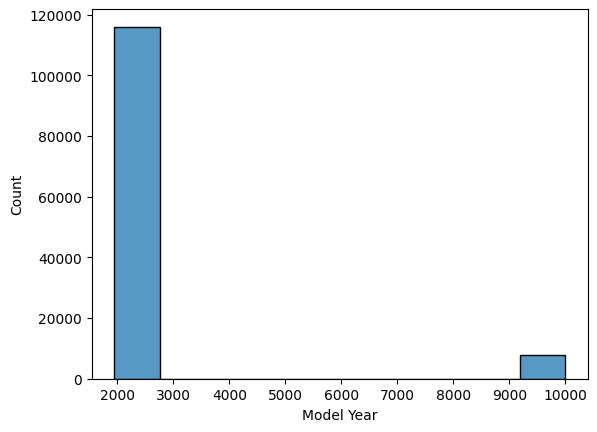

In [21]:
sns.histplot(df['Model Year'], bins=10)

We noticed that some observations had `'Model Year' = 9999`, which is a completely unrealistic value, so we will replace these with `np.nan`.

In [22]:
df['Model Year'] = df['Model Year'].replace(9999, np.nan)

## Exploratory Data Analysis

**Plot the number of units recalled each year.**

In [23]:
est_units_grouped_year = df.groupby('Recall Year')['Estimated Units'].sum()

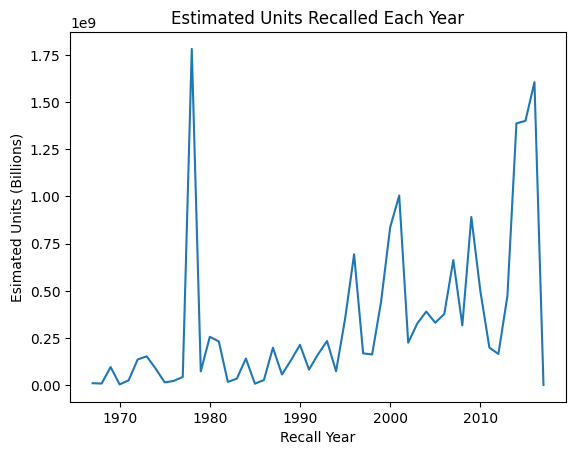

In [24]:
sns.lineplot(est_units_grouped_year)
plt.title('Estimated Units Recalled Each Year')
plt.ylabel('Esimated Units (Billions)')
plt.show()

The general trend seems to be that the amount of units getting recalled is increasing over time.

**Plot the makes that have the highest recalled units.**

In [25]:
est_units_grouped_make = df.groupby('Vehicle Make')['Estimated Units'].sum().sort_values(ascending=False)
est_units_grouped_make = est_units_grouped_make.take(np.arange(20)).reset_index()
est_units_grouped_make

,Vehicle Make,Estimated Units
0,FORD,3.773864e+09
1,CHEVROLET,2.298467e+09
2,HONDA,9.596681e+08
3,DODGE,9.026136e+08
4,GMC,8.030415e+08
5,TOYOTA,6.984547e+08
6,MERCURY,6.645924e+08
7,PONTIAC,5.803380e+08
8,LINCOLN,4.830383e+08
9,BUICK,4.300800e+08


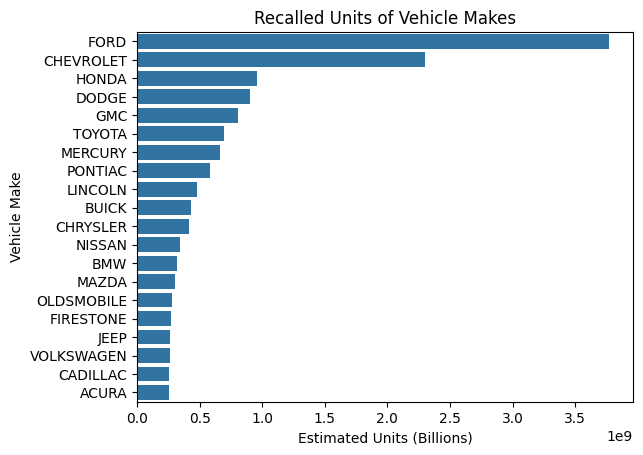

In [26]:
sns.barplot(est_units_grouped_make, x='Estimated Units', y='Vehicle Make')
plt.title('Recalled Units of Vehicle Makes')
plt.xlabel('Estimated Units (Billions)')
plt.show()

We can see that FORD has the highest number of units recalled at about 3.7 billion with CHEVROLET in second at about 2.4 billion.

**Visualize which FORD models have the most recalled units.**

In [27]:
ford_df = df[df['Vehicle Make'] == 'FORD']
model_grouped_units = ford_df.groupby('Vehicle Model')['Estimated Units'].sum().sort_values(ascending=False).take(np.arange(20)).reset_index()

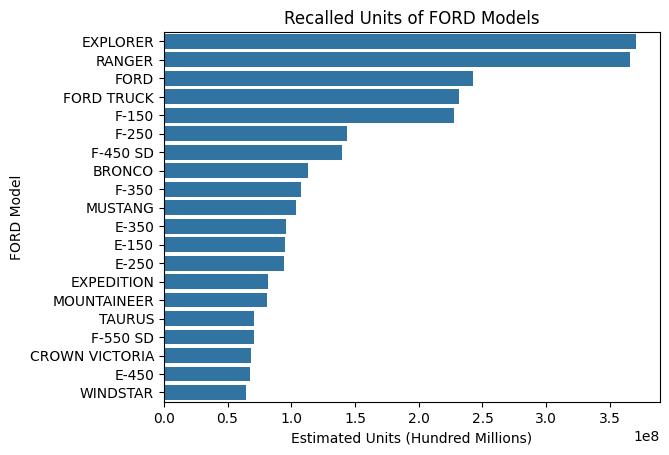

In [28]:
sns.barplot(model_grouped_units.reset_index(), x='Estimated Units', y='Vehicle Model')
plt.title('Recalled Units of FORD Models')
plt.ylabel('FORD Model')
plt.xlabel('Estimated Units (Hundred Millions)')
plt.show()

We can observe that the EXPLORER and RANGER are the FORD models with the most units recalled, and the rest of the models are relatively closer together.

**Visualize which components had the most recalled units.**

In [29]:
components_grouped_units = df.groupby('Recall Component')['Estimated Units'].sum().sort_values(ascending=False).take(np.arange(20))

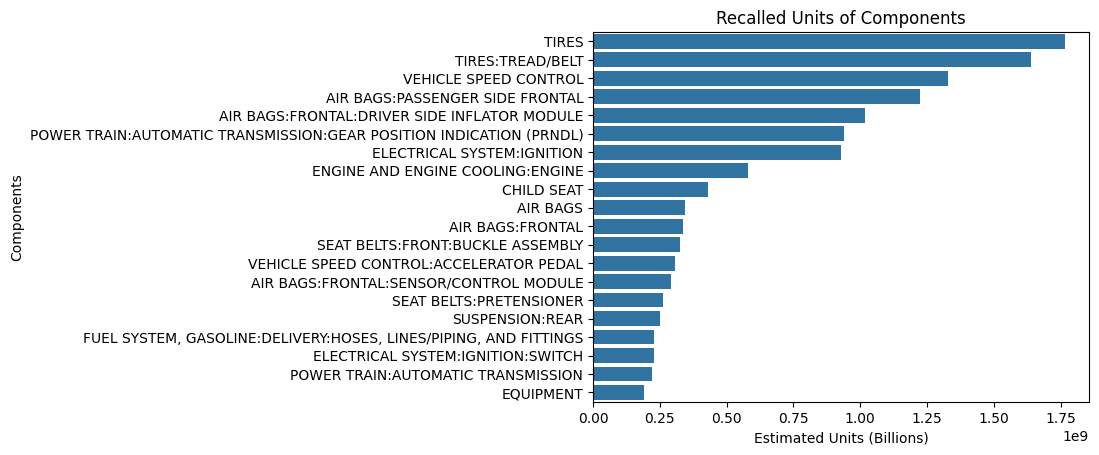

In [30]:
sns.barplot(components_grouped_units.reset_index(), x='Estimated Units', y='Recall Component')
plt.title('Recalled Units of Components')
plt.ylabel('Components')
plt.xlabel('Estimated Units (Billions)')
plt.show()

## Statistical Inference

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

**Extra preprocessing.**

In [38]:
impute_categories = ['Manufacturer Campaign', 'Vehicle Manufacturer', 'Recall Initiative']
impute_nums = ['Model Year', 'Estimated Units', 'Recall Year', 'Manufacture Start Year', 'Manufacture End Year']

most_frequent = SimpleImputer(strategy='most_frequent')
mean = SimpleImputer(strategy='mean')

df[impute_categories] = most_frequent.fit_transform(df[impute_categories])
df[impute_nums] = mean.fit_transform(df[impute_nums])

**Split our data.**

In [39]:
X = df.drop(columns=['Manufacture Start Date', 'Manufacture End Date', 'Recall Notification Date', 'Recall Initiative'])
y = df['Recall Initiative']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

**Implement a simple classifier to predict `'Recall Initiative'`.**

In [41]:
encode_cols = [
    'NHTSA Campaign',
    'Manufacturer Campaign',
    'Vehicle Make',
    'Vehicle Model',
    'Vehicle Manufacturer',
    'Recall Type',
    'Recall Component',
    'Recall Manufacturer'
]

scale_cols = [
    'Model Year',
    'Estimated Units',
    'Recall Year',
    'Manufacture Start Year',
    'Manufacture End Year'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), encode_cols),
        ('scale', StandardScaler(), scale_cols)
    ]
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10))
    ]
)

In [42]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Accuracy: 0.74
              precision    recall  f1-score   support

         MFR       0.76      0.93      0.84     17388
         ODI       0.56      0.30      0.39      5738
        OVSC       1.00      0.31      0.48      1642

    accuracy                           0.74     24768
   macro avg       0.77      0.51      0.57     24768
weighted avg       0.73      0.74      0.71     24768



**Implement a more complicated classifier using ensemble learning and cross validation.**

In [43]:
# pipeline = Pipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', RandomForestClassifier(random_state=10))
#     ]
# )

# param_grid = {
#     'classifier__n_estimators': [10, 20, 30],
#     'classifier__max_depth': [None, 3, 5],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

In [44]:
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score found: ", grid_search.best_score_)

This grid search took over an hour to execute so for simplicity we comment out the code block and keep the results.

```
Best parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 30}
Best score found:  0.9843846062429961
```

**Evaluate our best model.**

In [50]:
best_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, n_estimators=30, random_state=10))
    ]
)
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.99


We were able to train a model with 100% train accuracy and 99% test accuracy. Despite the high accuracy, this does not imply the model was overfit because the disparity between our train and test accuracy was only 1%.

## Conclusions

This analysis of the vehicle recalls dataset, sourced from the NHTSA, provides insights into the trends, patterns, and key players involved in vehicle safety recalls. The findings are summarized as follows:

### Volume and Initiators of Recalls:

- The majority of recalls are manufacturer-initiated (MFR), accounting for a significant proportion of cases. This suggests that manufacturers often take proactive steps to address safety issues.
- Recalls initiated by the Office of Defects Investigation (ODI) and the Office of Vehicle Safety Compliance (OVSC) are fewer but reflect critical safety oversight by regulatory bodies.

### Trends Over Time:

- There is a noticeable trend in the increase of recalls over the years, likely driven by stricter safety regulations, improved defect detection methods, and increased transparency.
- Periodic spikes in recalls might correspond to large-scale investigations or particular safety incidents.

### Most Affected Components:

- Recalls are most commonly associated with critical vehicle systems such as airbags, brakes, tires, and powertrain components.
- Safety-related issues with these components highlight their importance in ensuring vehicle reliability and user safety.

### Key Manufacturers:

- A small number of manufacturers dominate the recall landscape. The analysis shows that well-known automakers are involved in most recalls due to their larger market share and higher production volumes.
- Specific trends, such as recalls concentrated around particular manufacturers, emphasize recurring safety or compliance concerns.

### Nature of Issues:

- The recalls predominantly relate to safety defects and non-compliance with Federal Motor Vehicle Safety Standards (FMVSS).
- Issues such as airbag inflator ruptures, defective tires, and braking system failures have been prominent contributors to recall cases.

### Impact of Recalls:

- Recalls play a critical role in mitigating safety risks, protecting lives, and maintaining regulatory compliance.
- They also indicate a broader need for improved quality control, testing protocols, and post-production monitoring in the automotive industry.

### Final Thoughts

The analysis underscores the importance of proactive safety initiatives by manufacturers and regulatory bodies like the NHTSA. While recalls may impose short-term costs, they are crucial for ensuring long-term safety, trust, and compliance within the automotive industry.